In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import skew
from sklearn.model_selection import cross_val_score,KFold




In [3]:
data1=pd.read_csv("D:/ResaleFlatPricesBasedonApprovalDate19901999.csv")
data2=pd.read_csv("D:/ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv")
data3=pd.read_csv("D:/ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")
data4=pd.read_csv("D:/ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")
data5=pd.read_csv("D:\ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")

In [4]:
data1.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200


In [5]:
data2.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2000-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,147000.0
1,2000-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,144000.0
2,2000-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,159000.0
3,2000-01,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,167000.0
4,2000-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1976,163000.0


In [6]:
data3.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0
2,2012-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,315000.0
3,2012-03,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,320000.0
4,2012-03,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980,321000.0


In [7]:
data4.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0


In [8]:
data5.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [9]:


data=pd.concat([data1,data2,data3,data4,data5],axis=0)
data.reset_index(drop=1,inplace=True)

In [10]:
data.shape


(924825, 11)

In [11]:
data.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924825 entries, 0 to 924824
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                924825 non-null  object 
 1   town                 924825 non-null  object 
 2   flat_type            924825 non-null  object 
 3   block                924825 non-null  object 
 4   street_name          924825 non-null  object 
 5   storey_range         924825 non-null  object 
 6   floor_area_sqm       924825 non-null  float64
 7   flat_model           924825 non-null  object 
 8   lease_commence_date  924825 non-null  int64  
 9   resale_price         924825 non-null  float64
 10  remaining_lease      215775 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 77.6+ MB


In [13]:
data.describe()

,floor_area_sqm,lease_commence_date,resale_price
count,924825.000000,924825.000000,9.248250e+05
mean,95.691950,1988.250913,3.200349e+05
std,25.829067,10.636905,1.697936e+05
min,28.000000,1966.000000,5.000000e+03
25%,73.000000,1981.000000,1.930000e+05
50%,93.000000,1986.000000,2.960000e+05
75%,113.000000,1996.000000,4.160000e+05
max,307.000000,2022.000000,1.568888e+06


In [14]:
data["year"]=data["month"].str.split("-").str[0].astype("int64")
data["month"]=data["month"].str.split("-").str[1].astype("int64")



In [15]:
data["year"].unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022,
       2023, 2024], dtype=int64)

In [16]:
data["month"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [17]:
remaining_lease_new= []
for item in data["remaining_lease"].astype(str):
    item1= item.replace("years","")
    item2= item1.replace("months","")
    item3= item2.replace("month","")
    item4= item3.strip()
    item5= item4.split("  ")
    remaining_lease_new.append(item5)


data_remaining_lease=pd.DataFrame(remaining_lease_new,columns=["remaining_lease_year","remaining_lease_month"])


data_remaining_lease["remaining_lease_year"]=data_remaining_lease["remaining_lease_year"].replace("nan",0).astype(int)
data_remaining_lease["remaining_lease_month"]=data_remaining_lease["remaining_lease_month"].fillna(0).astype(int)

In [18]:
data["remaining_lease_year"]=data_remaining_lease["remaining_lease_year"].values
data["remaining_lease_month"]=data_remaining_lease["remaining_lease_month"].values
data.drop("remaining_lease",axis=1,inplace=True)

In [19]:
data.tail()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year,remaining_lease_year,remaining_lease_month
924820,3,YISHUN,EXECUTIVE,824,YISHUN ST 81,07 TO 09,142.0,Apartment,1987,855000.0,2024,62,8
924821,4,YISHUN,EXECUTIVE,826,YISHUN ST 81,04 TO 06,146.0,Maisonette,1988,900000.0,2024,62,10
924822,4,YISHUN,EXECUTIVE,836,YISHUN ST 81,04 TO 06,142.0,Apartment,1988,805000.0,2024,62,10
924823,2,YISHUN,MULTI-GENERATION,666,YISHUN AVE 4,04 TO 06,164.0,Multi Generation,1987,998000.0,2024,62,11
924824,3,YISHUN,MULTI-GENERATION,666,YISHUN AVE 4,10 TO 12,164.0,Multi Generation,1987,1200000.0,2024,62,9


In [20]:
data.isnull().sum()

month                    0
town                     0
flat_type                0
block                    0
street_name              0
storey_range             0
floor_area_sqm           0
flat_model               0
lease_commence_date      0
resale_price             0
year                     0
remaining_lease_year     0
remaining_lease_month    0
dtype: int64

<Axes: >

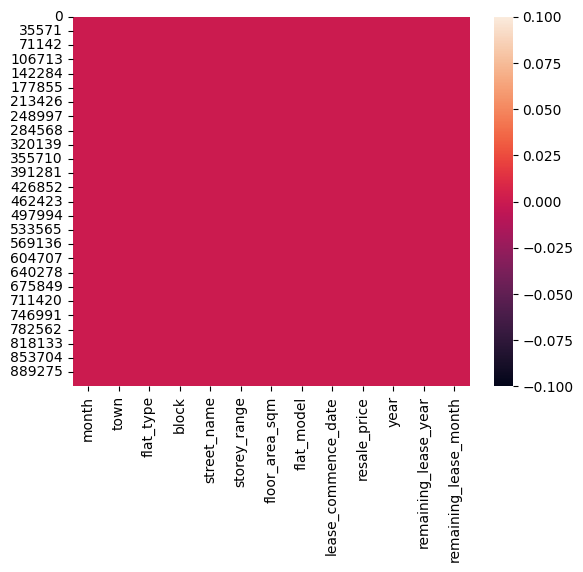

In [21]:
sns.heatmap(data.isnull())

In [22]:
data.storey_range.unique()

array(['10 TO 12', '04 TO 06', '07 TO 09', '01 TO 03', '13 TO 15',
       '19 TO 21', '16 TO 18', '25 TO 27', '22 TO 24', '28 TO 30',
       '31 TO 33', '40 TO 42', '37 TO 39', '34 TO 36', '06 TO 10',
       '01 TO 05', '11 TO 15', '16 TO 20', '21 TO 25', '26 TO 30',
       '36 TO 40', '31 TO 35', '46 TO 48', '43 TO 45', '49 TO 51'],
      dtype=object)

In [23]:
data[["storey_start","storey_end"]]=data.storey_range.str.split(" TO ",expand=True).astype(int)
data.drop("storey_range",axis=1,inplace=True)

In [24]:
data.flat_type.unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION', 'MULTI-GENERATION'], dtype=object)

In [25]:
label_encoding=preprocessing.LabelEncoder()
data.flat_type=label_encoding.fit_transform(data.flat_type)

In [26]:
data.flat_type.unique()

array([0, 2, 3, 4, 1, 5, 6, 7])

In [27]:
data.flat_model.unique()

array(['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED',
       'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE',
       '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI GENERATION',
       'PREMIUM APARTMENT', 'Improved', 'New Generation', 'Model A',
       'Standard', 'Apartment', 'Simplified', 'Model A-Maisonette',
       'Maisonette', 'Multi Generation', 'Adjoined flat',
       'Premium Apartment', 'Terrace', 'Improved-Maisonette',
       'Premium Maisonette', '2-room', 'Model A2', 'DBSS', 'Type S1',
       'Type S2', 'Premium Apartment Loft', '3Gen'], dtype=object)

In [28]:
data.flat_model=label_encoding.fit_transform(data.flat_model)

In [29]:
data.flat_model.unique()

array([ 7, 20, 12, 27, 26, 13,  3, 11, 30,  0,  8, 14, 22,  9, 21, 16, 29,
        5, 28, 17, 15, 19,  4, 23, 31, 10, 25,  1, 18,  6, 32, 33, 24,  2])

In [30]:
data.town.unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG', 'CLEMENTI',
       'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'QUEENSTOWN', 'SENGKANG',
       'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS', 'YISHUN',
       'LIM CHU KANG', 'SEMBAWANG', 'BUKIT PANJANG', 'PASIR RIS',
       'PUNGGOL'], dtype=object)

In [31]:
data.street_name.unique()

array(['ANG MO KIO AVE 1', 'ANG MO KIO AVE 3', 'ANG MO KIO AVE 4',
       'ANG MO KIO AVE 10', 'ANG MO KIO AVE 5', 'ANG MO KIO AVE 8',
       'ANG MO KIO AVE 6', 'ANG MO KIO AVE 9', 'ANG MO KIO AVE 2',
       'BEDOK RESERVOIR RD', 'BEDOK NTH ST 3', 'BEDOK STH RD',
       'NEW UPP CHANGI RD', 'BEDOK NTH RD', 'BEDOK STH AVE 1',
       'CHAI CHEE RD', 'CHAI CHEE DR', 'BEDOK NTH AVE 4',
       'BEDOK STH AVE 3', 'BEDOK STH AVE 2', 'BEDOK NTH ST 2',
       'BEDOK NTH ST 4', 'BEDOK NTH AVE 2', 'BEDOK NTH AVE 3',
       'BEDOK NTH AVE 1', 'BEDOK NTH ST 1', 'CHAI CHEE ST', 'SIN MING RD',
       'SHUNFU RD', 'BT BATOK ST 11', 'BT BATOK WEST AVE 8',
       'BT BATOK WEST AVE 6', 'BT BATOK ST 21', 'BT BATOK EAST AVE 5',
       'BT BATOK EAST AVE 4', 'HILLVIEW AVE', 'BT BATOK CTRL',
       'BT BATOK ST 31', 'BT BATOK EAST AVE 3', 'TAMAN HO SWEE',
       'TELOK BLANGAH CRES', 'BEO CRES', 'TELOK BLANGAH DR', 'DEPOT RD',
       'TELOK BLANGAH RISE', 'JLN BT MERAH', 'HENDERSON RD', 'INDUS RD',
       

In [32]:
data.street_name.nunique()


584

In [33]:
data.block.nunique()

2708

In [34]:
data.town.nunique()

27

In [35]:
data.street_name=label_encoding.fit_transform(data.street_name)
data.block=label_encoding.fit_transform(data.block)
data.town=label_encoding.fit_transform(data.town)



In [36]:
data.street_name.unique()

array([ 13,  16,  17,  14,  18,  20,  19,  21,  15,  45,  42,  50, 340,
        39,  47, 115, 114,  38,  49,  48,  41,  43,  36,  37,  35,  40,
       116, 437, 425,  70,  86,  84,  71,  68,  67, 200,  65,  75,  66,
       448, 487,  52, 488, 166, 490, 236, 199, 228,  90, 198,  92, 489,
       178, 292, 385, 226, 197, 241, 248, 235, 294, 335, 492, 299, 298,
       175, 382, 181, 242, 345, 424, 397, 505, 510, 380,  97, 393, 392,
        30, 438, 509, 484, 486, 143, 512, 142, 145, 144, 141, 513, 151,
       152, 149,  99, 146, 150, 139, 322, 246, 192, 176, 434,   5, 189,
       163, 366, 196,  31, 238, 191, 177, 208, 210, 205, 218, 206, 318,
       216, 212, 217, 483, 255, 260, 256, 257, 258, 259, 347, 579, 201,
       227,  61,  60,  62, 271, 268, 261, 269, 233, 441, 342, 186,  33,
       514, 504,  51, 517, 320, 285, 188, 167, 346, 291, 232, 338, 501,
       247, 290,   2, 300, 162, 324, 325, 327, 100, 102, 481, 101, 170,
       323, 194, 169, 442, 334, 203, 202, 204, 168, 398, 319, 42

In [37]:
data.block.unique()

array([ 829,  447,  430, ..., 1752, 1748, 1753])

In [38]:
data.town.unique()

array([ 0,  1,  2,  3,  4,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 19, 21,
       22, 23, 24, 25, 26, 15, 20,  5, 17, 18])

In [39]:
data.tail()

,month,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,year,remaining_lease_year,remaining_lease_month,storey_start,storey_end
924820,3,26,5,2366,575,142.0,5,1987,855000.0,2024,62,8,7,9
924821,4,26,5,2368,575,146.0,15,1988,900000.0,2024,62,10,4,6
924822,4,26,5,2383,575,142.0,5,1988,805000.0,2024,62,10,4,6
924823,2,26,7,1954,556,164.0,19,1987,998000.0,2024,62,11,4,6
924824,3,26,7,1954,556,164.0,19,1987,1200000.0,2024,62,9,10,12


In [40]:
#All the catogorical features converted into numerical.
#Next let's select features by checking corrulation fo features with target (resale_price)

In [41]:
corre=data.corrwith(data.resale_price).abs().sort_values()
corre

month                    0.006127
street_name              0.031605
block                    0.040238
town                     0.057755
flat_model               0.190293
storey_start             0.246821
storey_end               0.249257
remaining_lease_month    0.418559
lease_commence_date      0.537536
remaining_lease_year     0.559677
floor_area_sqm           0.564052
flat_type                0.589988
year                     0.673155
resale_price             1.000000
dtype: float64

<Axes: >

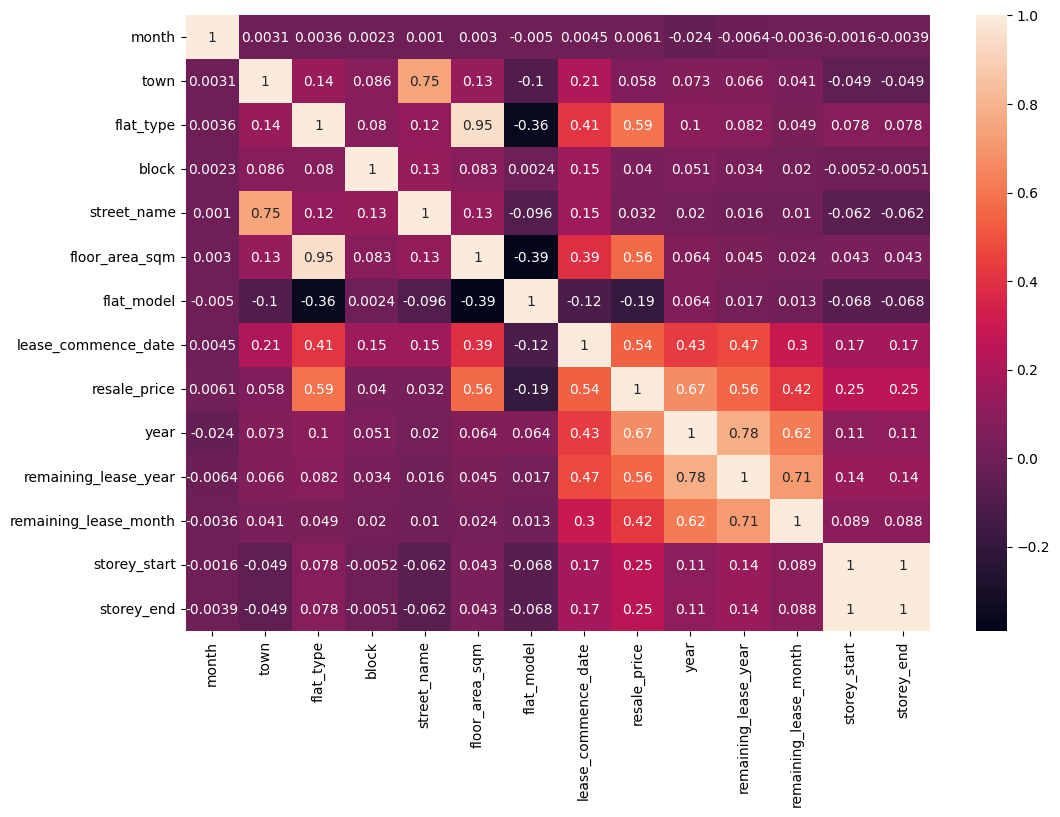

In [42]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True)

In [43]:
#From above figure we can find that the features "month","street_name","block" have very low corrulation with target feature(resale_pice)
#So let's drop that features

In [44]:
data.drop(["month","street_name","block"],axis=1,inplace=True)

In [45]:
#Now check the shape of our dataframe
data.shape

(924825, 11)

In [46]:
data.duplicated().sum()

65468

In [47]:
#Now we can check the distribution,skewness,outlier of each features using visualization,ie using distplot,histogram,box plot

for i in data.columns:
    print("Skew in ",i ,skew(data[i]))

Skew in  town -0.08566107188970702
Skew in  flat_type 0.39862278311527
Skew in  floor_area_sqm 0.36638203791263546
Skew in  flat_model 0.207613510448531
Skew in  lease_commence_date 0.6438939001498497
Skew in  resale_price 0.9375147523775126
Skew in  year 0.29479251214707075
Skew in  remaining_lease_year 1.4035594081273326
Skew in  remaining_lease_month 2.4958944472797526
Skew in  storey_start 1.3500142285872663
Skew in  storey_end 1.3507175111424852


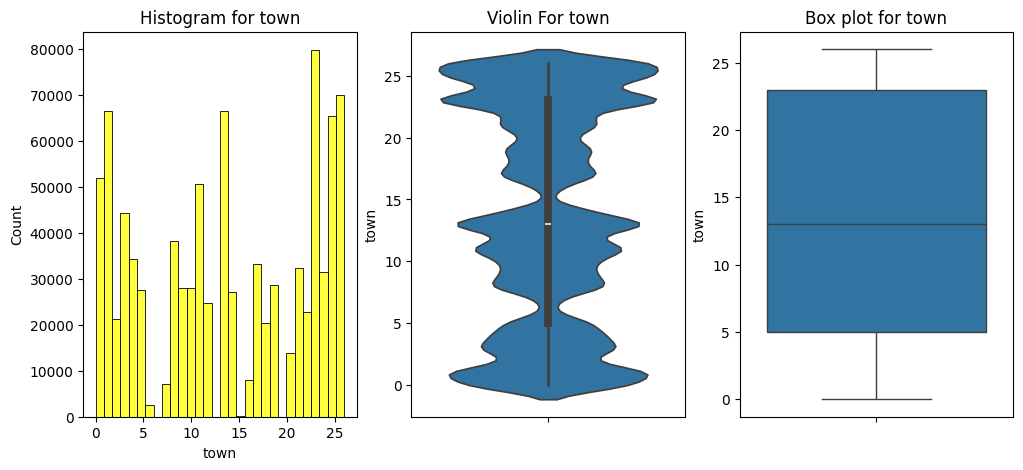

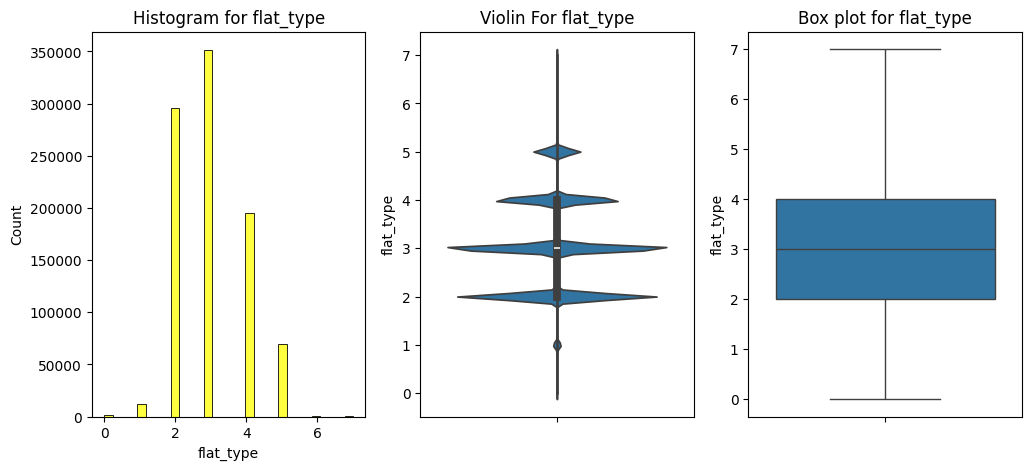

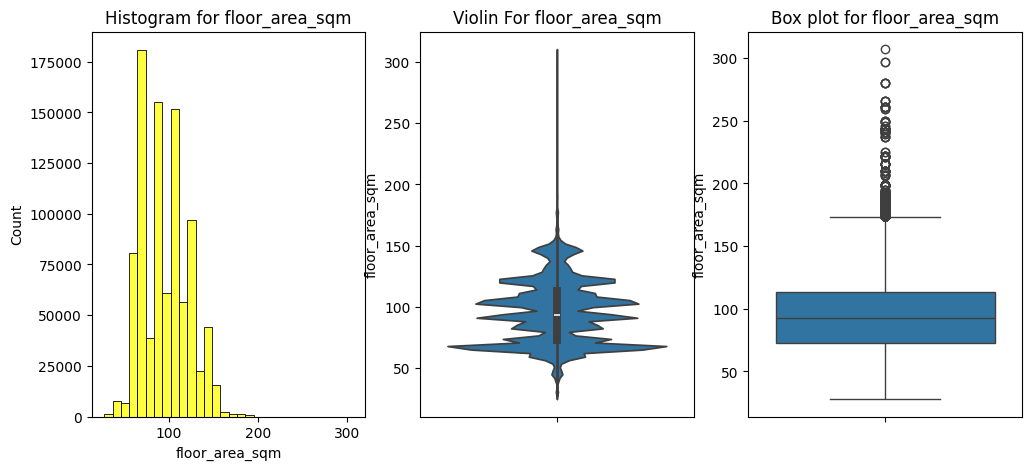

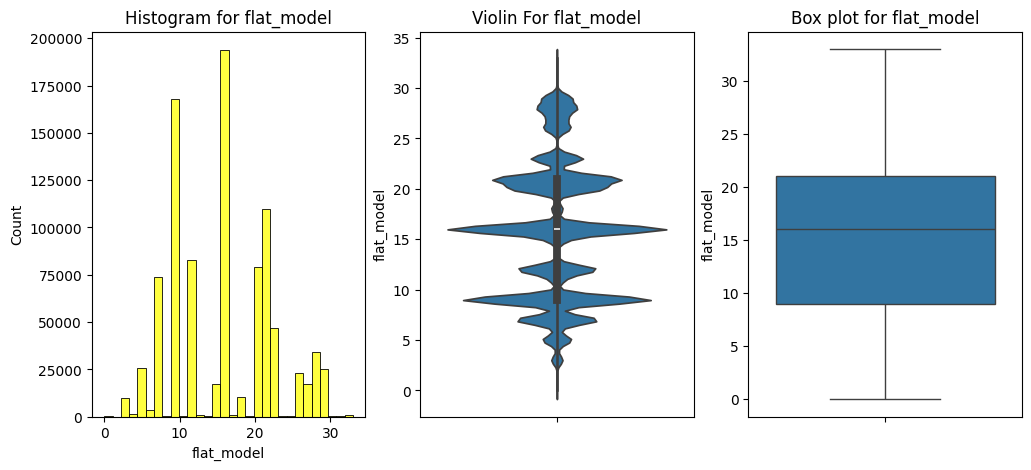

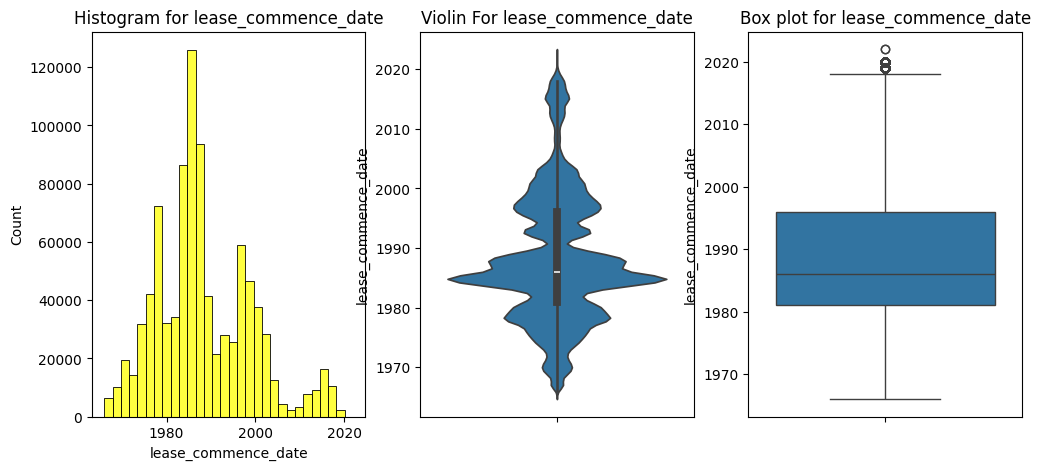

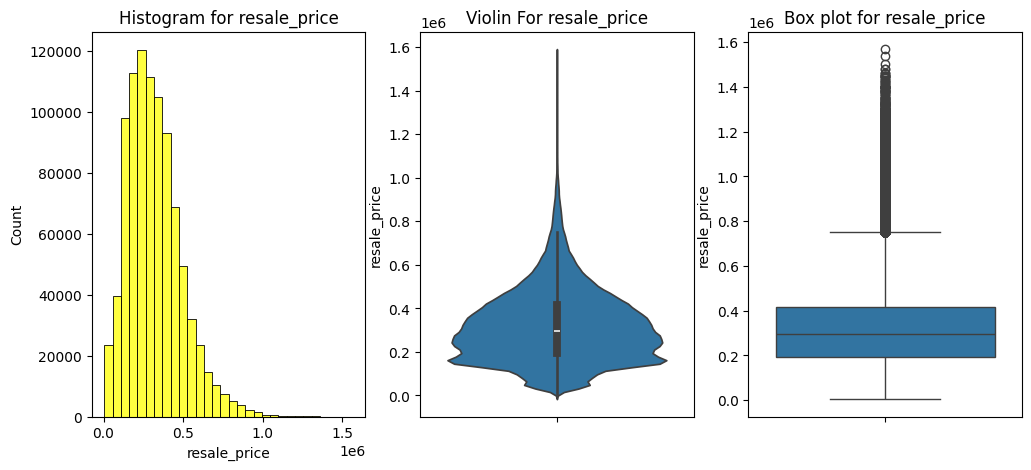

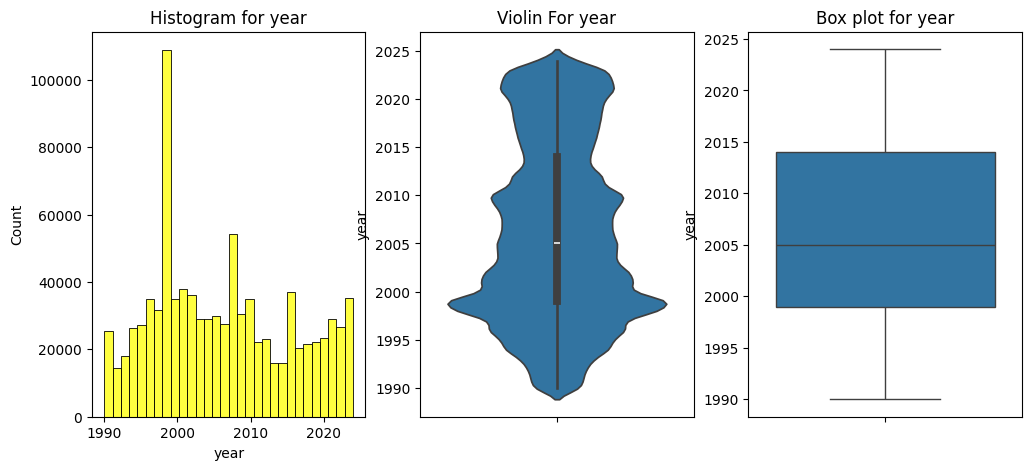

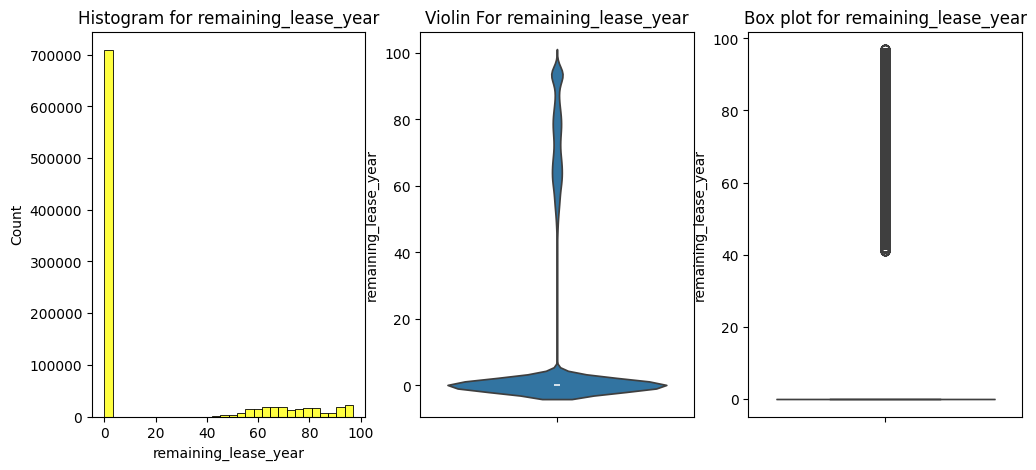

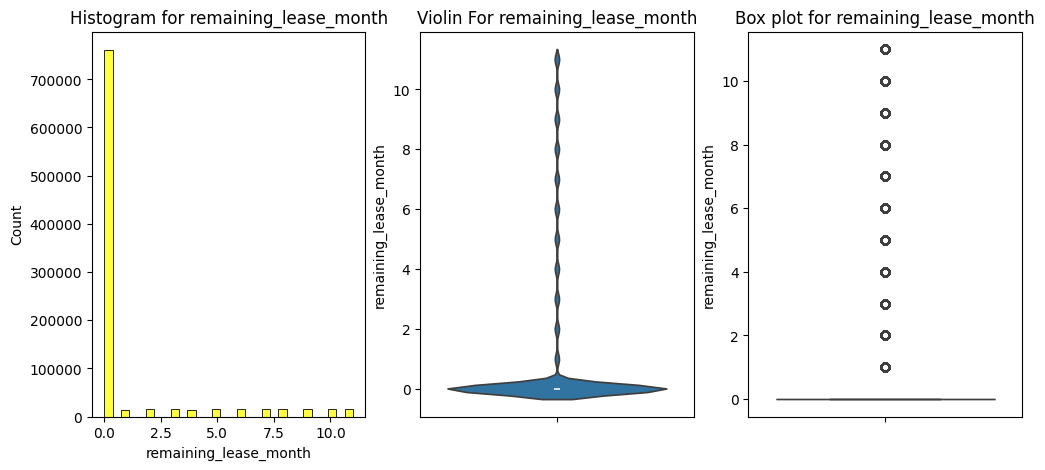

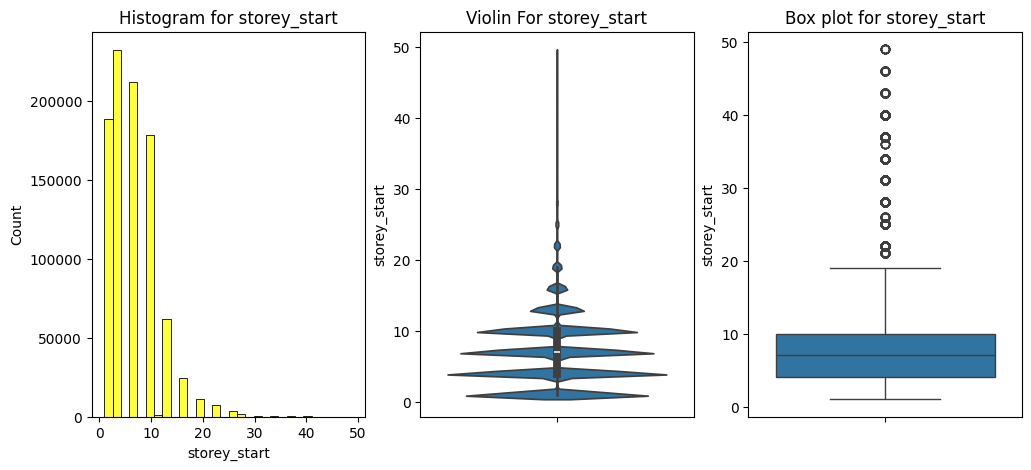

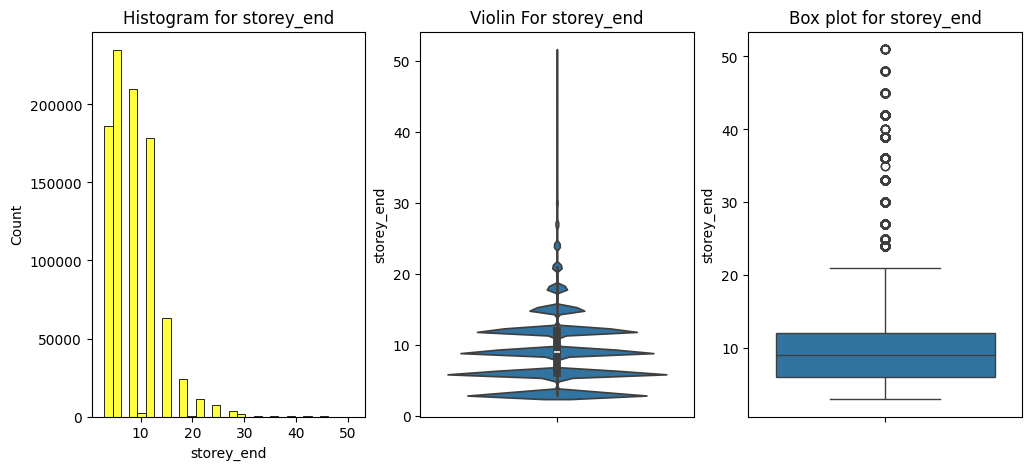

In [48]:
def plot(df,column):
    plt.figure(figsize=(12,5))
    #Histogram
    plt.subplot(1,3,1)
    sns.histplot(df,x=df[column],color="Yellow",bins=30)
    plt.title("Histogram for " +column)
    


    #distribution plot
    plt.subplot(1,3,2)
    sns.violinplot(df[column])
    plt.title("Violin For "+ column)

    #Boxplot
    plt.subplot(1,3,3)
    sns.boxplot(df[column])
    plt.title("Box plot for "+ column)


for item in data.columns:
    plot(data,item)

In [49]:
#From the above figure we can see that outliers are present in some features('floor_area_sqm','lease_commence_date','resale_price','remaining_lease_year', 'remaining_lease_month', 'storey_start','storey_end)


In [50]:
column=['floor_area_sqm','lease_commence_date','resale_price', 'storey_start','storey_end']
def outlier(df1,column1):
    Q1=df1[column1].quantile(.25)
    Q3=df1[column1].quantile(.75)
    IQR=Q3-Q1
    lower_fence=Q1-(1.5*IQR)
    upper_fence=Q3+(1.5*IQR)
    df1[column1]= df1[column1].clip(upper_fence,lower_fence)
    return df1


for item2 in column:
    outlier(data,item2)




In [51]:


for i in data.columns:
    print("Skew in ",i ,skew(data[i]))

Skew in  town -0.08566107188970702
Skew in  flat_type 0.39862278311527
Skew in  floor_area_sqm 0.33166626190104503
Skew in  flat_model 0.207613510448531
Skew in  lease_commence_date 0.6413664369885366
Skew in  resale_price 0.6393287265730273
Skew in  year 0.29479251214707075
Skew in  remaining_lease_year 1.4035594081273326
Skew in  remaining_lease_month 2.4958944472797526
Skew in  storey_start 0.7017307571525303
Skew in  storey_end 0.701597857384647


In [52]:

data.remaining_lease_year =np.cbrt(data["remaining_lease_year"])
data.remaining_lease_month =np.cbrt(data["remaining_lease_month"])

In [53]:
data.duplicated().sum()
New_data1=data.drop_duplicates()
New_data1.reset_index(drop=True,inplace=True)

In [54]:


for i in New_data1.columns:
    print("Skew in ",i ,skew(New_data1[i]))

Skew in  town -0.08494142231615764
Skew in  flat_type 0.3703659175810951
Skew in  floor_area_sqm 0.2973054595606266
Skew in  flat_model 0.2241747792900115
Skew in  lease_commence_date 0.6190938364752936
Skew in  resale_price 0.5965405785784856
Skew in  year 0.24362839204501138
Skew in  remaining_lease_year 1.1917277817541194
Skew in  remaining_lease_month 1.7722276821816314
Skew in  storey_start 0.6861885116905811
Skew in  storey_end 0.686026174847123


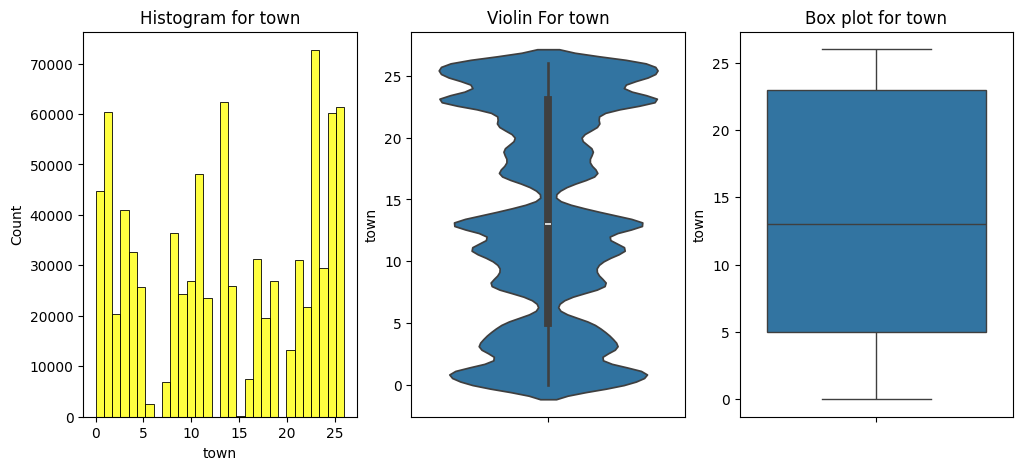

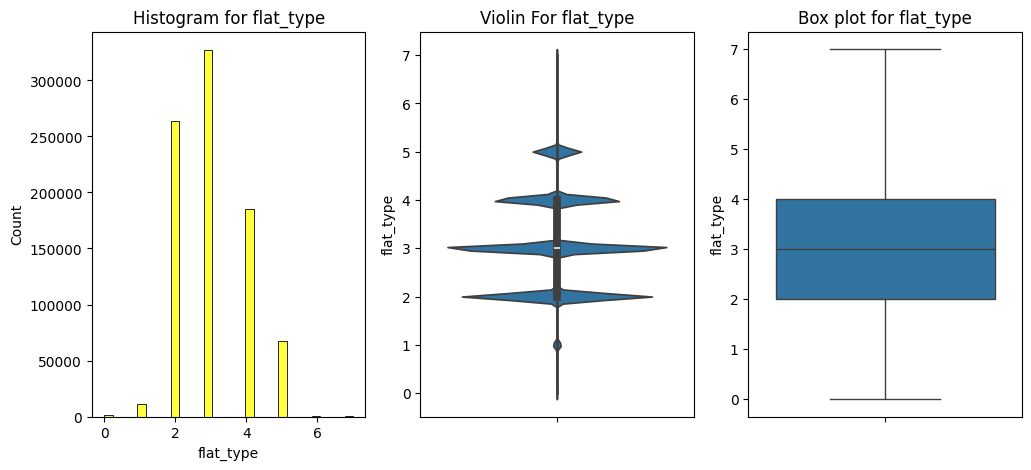

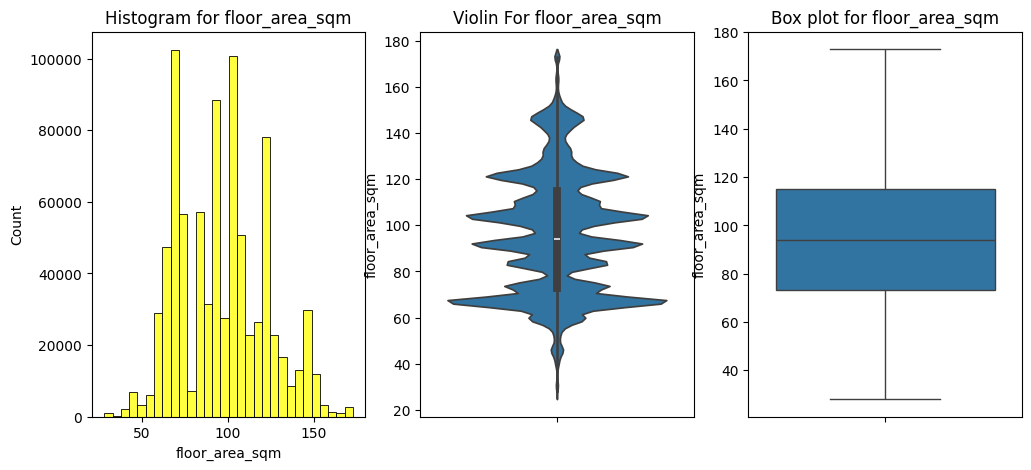

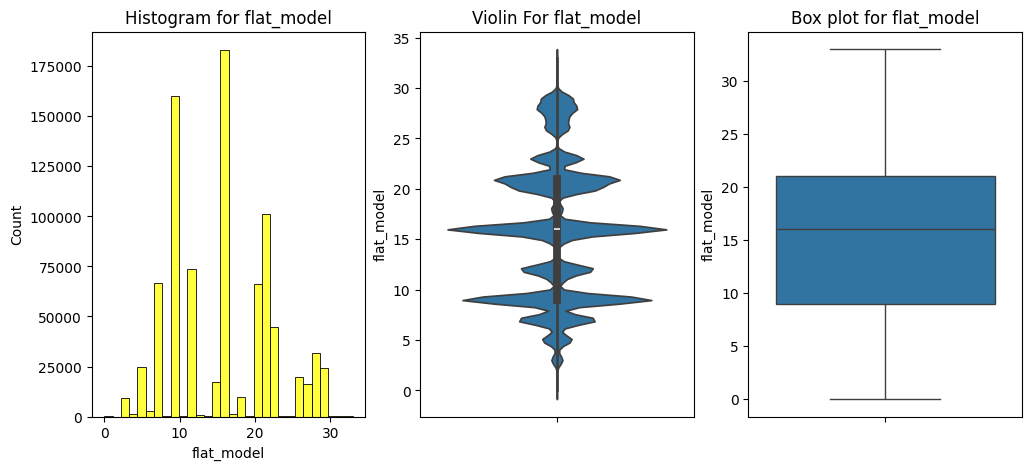

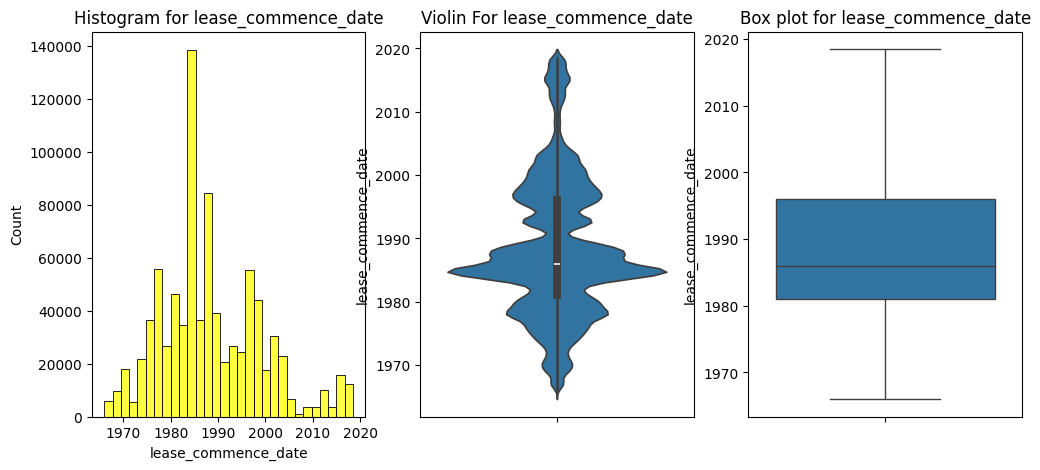

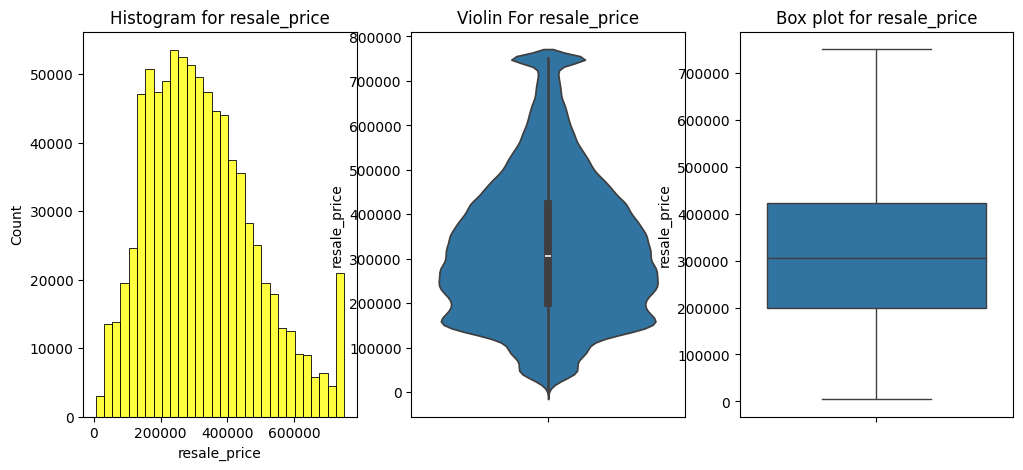

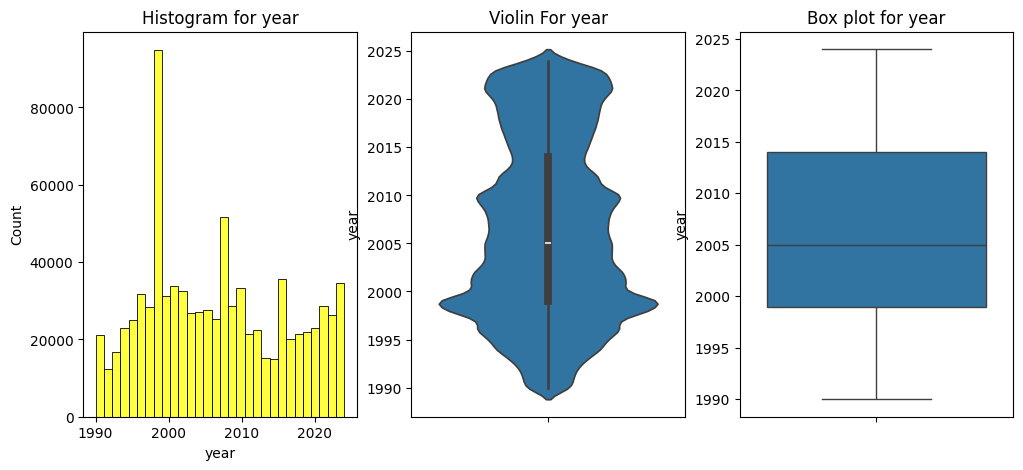

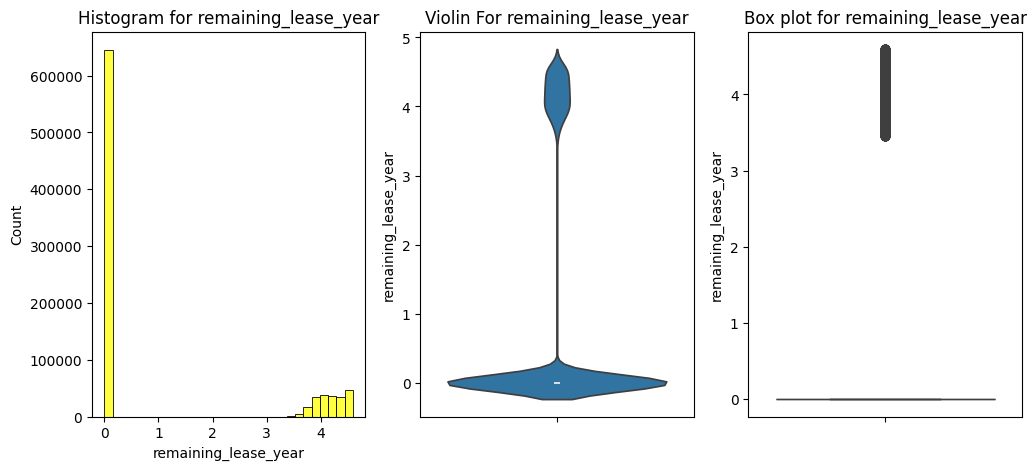

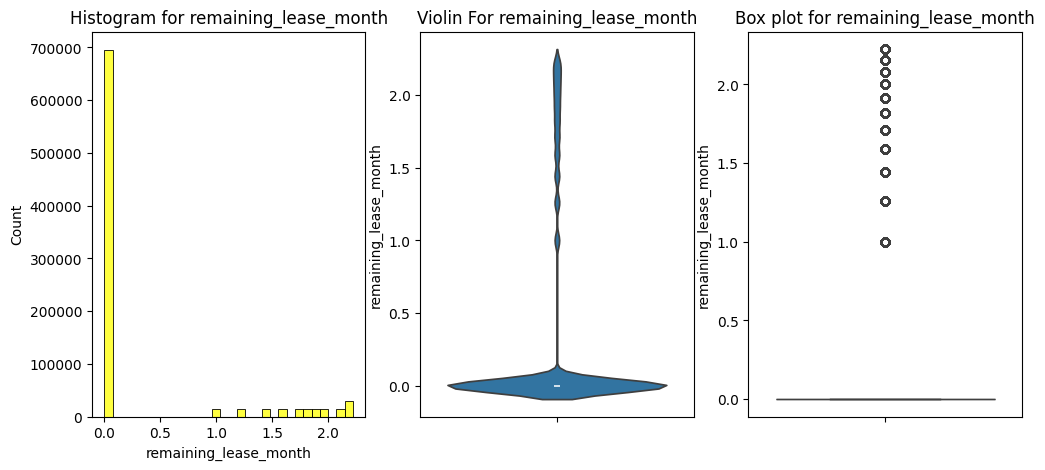

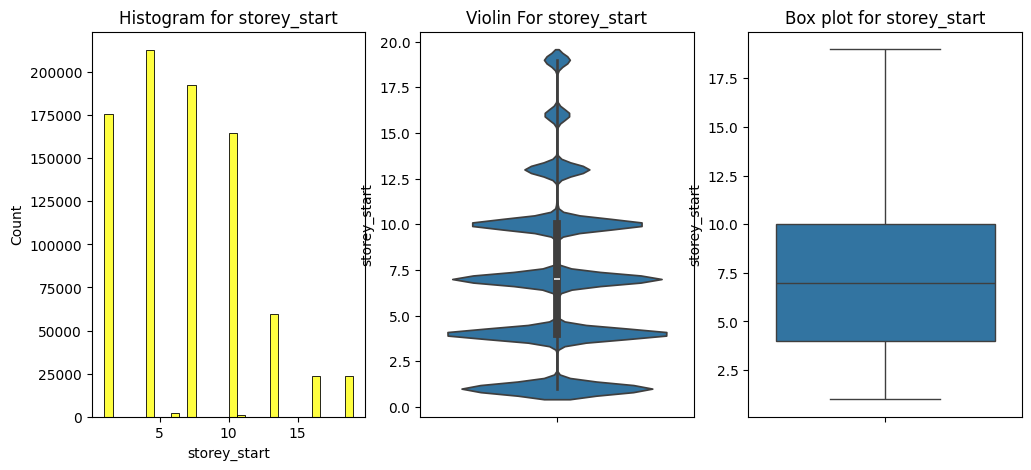

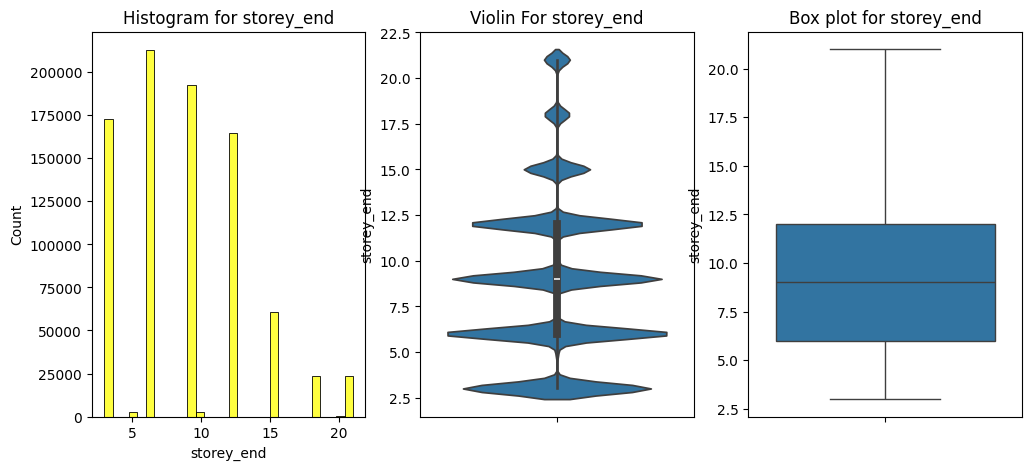

In [55]:
#Let's check After Removing outliers
def plot(df,column):
    plt.figure(figsize=(12,5))
    #Histogram
    plt.subplot(1,3,1)
    sns.histplot(df,x=df[column],color="Yellow",bins=30)
    plt.title("Histogram for " +column)
    


    #distribution plot
    plt.subplot(1,3,2)
    sns.violinplot(df[column])
    plt.title("Violin For "+ column)

    #Boxplot
    plt.subplot(1,3,3)
    sns.boxplot(df[column])
    plt.title("Box plot for "+ column)


for item in New_data1.columns:
    plot(New_data1,item)

In [56]:
New_data1.duplicated().sum()


0

In [57]:
#From the above fingure we can fnd that after removing the outlier the skewness of each feature also decreased,ie,Distribution of data in  every features get normalised

#Here Data preprocessing completed,Next let's move to training of machine learning model that will help to predict the unseen target

In [58]:
#First we have to import all the usefull libraries for Model training using sklaern pakeage

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

import pickle

In [59]:
cleaned_data=New_data1.copy()


In [60]:
#First step of ML model training is spliting data into train and test data
#First saparate depended variable and independend variable y_new and x_new

x_new=cleaned_data.drop("resale_price",axis=1)
y_new=cleaned_data.resale_price



In [61]:
#To split data as train and test data
#Its important to scale the data points  it  ensures  the data points have a balanced scale.Here i am using StandardScaler(We can also use Minimaxscale)
Scalar=StandardScaler()

x_scaled=Scalar.fit_transform(x_new)

x_train,x_test,y_train,y_test=train_test_split(x_scaled,y_new,test_size=.3,random_state=42)


In [62]:
print(x_train.shape)
print(x_test.shape)

(599515, 10)
(256935, 10)


LinearRegression

In [63]:
#To select Model check perfomance of each model using evaluation metrics such as r2 scaore,mean_squared_error,mean_absolute_error

model=LinearRegression()
model.fit(x_train,y_train)
y_predict_test=model.predict(x_test)
y_predict_train=model.predict(x_train)


print("R2_score for train data :",r2_score(y_train,y_predict_train))
print("Mean_squared_error for train data:",mean_squared_error(y_train,y_predict_train))
print("Mean_absolute_error for train data :",mean_absolute_error(y_train,y_predict_train))
print()
print("R2_score for test data:",r2_score(y_test,y_predict_test))
print("Mean_squared_error for test data :",mean_squared_error(y_test,y_predict_test))
print("Mean_absolute_error for test data :",mean_absolute_error(y_test,y_predict_test))

R2_score for train data : 0.7730910813796855
Mean_squared_error for train data: 5926595286.320546
Mean_absolute_error for train data : 58925.03712035465

R2_score for test data: 0.7735868042792946
Mean_squared_error for test data : 5890957348.79706
Mean_absolute_error for test data : 58799.012251634515


DecisionTreeRegressor

In [64]:
#To select Model check perfomance of each model using evaluation metrics such as r2 scaore,mean_squared_error,mean_absolute_error

model=DecisionTreeRegressor()
model.fit(x_train,y_train)
y_predict=model.predict(x_test)
print("R2_score :",r2_score(y_test,y_predict))
print("Mean_squared_error :",mean_squared_error(y_test,y_predict))
print("Mean_absolute_error :",mean_absolute_error(y_test,y_predict))

R2_score : 0.9615094647104317
Mean_squared_error : 1001470347.1741109
Mean_absolute_error : 21511.765095852836


RandomForestRegressor

AdaBoostRegressor

In [66]:
#To select Model check perfomance of each model using evaluation metrics such as r2 scaore,mean_squared_error,mean_absolute_error

model=AdaBoostRegressor()
model.fit(x_train,y_train)
y_predict=model.predict(x_test)
print("R2_score :",r2_score(y_test,y_predict))
print("Mean_squared_error :",mean_squared_error(y_test,y_predict))
print("Mean_absolute_error :",mean_absolute_error(y_test,y_predict))

R2_score : 0.7046777262178094
Mean_squared_error : 7683875992.575619
Mean_absolute_error : 74878.60377013574


ExtraTreesRegressor

In [67]:
#To select Model check perfomance of each model using evaluation metrics such as r2 scaore,mean_squared_error,mean_absolute_error

model=ExtraTreesRegressor()
model.fit(x_train,y_train)
y_predict=model.predict(x_test)
print("R2_score :",r2_score(y_test,y_predict))
print("Mean_squared_error :",mean_squared_error(y_test,y_predict))
print("Mean_absolute_error :",mean_absolute_error(y_test,y_predict))

R2_score : 0.9686002998824031
Mean_squared_error : 816976650.0092076
Mean_absolute_error : 20136.88504798293


GradientBoostingRegressor

In [68]:
#To select Model check perfomance of each model using evaluation metrics such as r2 scaore,mean_squared_error,mean_absolute_error

model=GradientBoostingRegressor()
model.fit(x_train,y_train)
y_predict=model.predict(x_test)
print("R2_score :",r2_score(y_test,y_predict))
print("Mean_squared_error :",mean_squared_error(y_test,y_predict))
print("Mean_absolute_error :",mean_absolute_error(y_test,y_predict))

R2_score : 0.9135484354592983
Mean_squared_error : 2249349812.960024
Mean_absolute_error : 33726.67745823908


XGBRegressor

In [69]:
#To select Model check perfomance of each model using evaluation metrics such as r2 scaore,mean_squared_error,mean_absolute_error

model=XGBRegressor()
model.fit(x_train,y_train)
y_predict=model.predict(x_test)
print("R2_score :",r2_score(y_test,y_predict))
print("Mean_squared_error :",mean_squared_error(y_test,y_predict))
print("Mean_absolute_error :",mean_absolute_error(y_test,y_predict))

R2_score : 0.9696029281129124
Mean_squared_error : 790889653.958342
Mean_absolute_error : 20477.6903289839


In [70]:
#From the above evalation we can see that Randomforest algorithm gives high r2 score and low mse and mae ,That means with randomforest algorithm model can predict the relation between indipended variable eand target with low error(differece between actual and predicted value))

#So i selected RandomForest algorthm   

x_train,x_test,y_train,y_test=train_test_split(x_scaled,y_new,test_size=.3,random_state=42)


In [71]:
x_train.shape

(599515, 10)

In [98]:
#x_train,x_test,y_train,y_test=train_test_split(x_scaled,y_new,test_size=.2,random_state=42)


Regressor_model=XGBRegressor().fit(x_train,y_train)

y_predict=Regressor_model.predict(x_test)

print("R2_score for train data :",r2_score(y_test,y_predict))
print("Mean_squared_error (MSE):",mean_squared_error(y_test,y_predict))
mse=mean_squared_error(y_test,y_predict)
print("Root Mean_squared_error (RMSE):",np.sqrt(mse))
print("Mean_absolute_erro (MAE):",mean_absolute_error(y_test,y_predict))

R2_score for train data : 0.9698301788749555
Mean_squared_error (MSE): 783893682.5872657
Root Mean_squared_error (RMSE): 27998.101410403986
Mean_absolute_erro (MAE): 20373.676627012876


In [108]:
DT_Regression=XGBRegressor()
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
cross_val_results = cross_val_score(DT_Regression, x_train, y_train, cv=kf)
   
print(f'Cross-Validation Results (Accuracy): {cross_val_results}')
print(f'Mean Accuracy: {cross_val_results.mean()}')

Cross-Validation Results (Accuracy): [0.96995493 0.96955813 0.96965919 0.96985304 0.96961745]
Mean Accuracy: 0.9697285467234295


In [73]:
#R2 score for train and test data is .9886 and .9718 respectively that means model without  overfitting
#Finally ,lets check with unseen data 


In [105]:
cleaned_data.iloc[856445]

town                         26.000000
flat_type                     5.000000
floor_area_sqm              142.000000
flat_model                    5.000000
lease_commence_date        1987.000000
resale_price             750500.000000
year                       2024.000000
remaining_lease_year          3.957892
remaining_lease_month         2.000000
storey_start                  7.000000
storey_end                    9.000000
Name: 856445, dtype: float64

In [109]:
unseen_data=np.array([[26,5,142,5,1987,2024,np.cbrt(3.957892),np.cbrt(2.0000),7,9]])
unseen_data_scalar=Scalar.transform(unseen_data)
y_predict_test=Regressor_model.predict(unseen_data_scalar)  
print("Resale_price is :",y_predict_test)

Resale_price is : [718366.94]


In [76]:
#finally we can store the selected model unsing pickling(serailising) method

In [100]:
#To store the model using pickling method
import pickle
#serailising
with open("Regressor_Dicision_Resale.pk1","wb") as f1:
    pickle.dump(Regressor_model,f1)

with open("standerd_scalar.pk1","wb") as f2:
    pickle.dump(Scalar,f2)

In [101]:
with open("Regressor_Dicision_Resale.pk1","rb") as f_:                        
       model_=pickle.load(f_)

with open("standerd_scalar.pk1","rb") as f_1:
 Sc=pickle.load(f_1)

In [79]:
cleaned_data.iloc[786986]

town                         14.000000
flat_type                     3.000000
floor_area_sqm               91.000000
flat_model                    9.000000
lease_commence_date        1974.000000
resale_price             368000.000000
year                       2021.000000
remaining_lease_year          3.708430
remaining_lease_month         1.709976
storey_start                  1.000000
storey_end                    3.000000
Name: 786986, dtype: float64

In [103]:
unseen_data=np.array([[14,3,91,9,1974,2021,np.cbrt(3.708430),np.cbrt(1.709976),1,3]])
unseen_data_scalar=Sc.transform(unseen_data)
y_predict_test=model_.predict(unseen_data_scalar)  
print("Resale_price is :",y_predict_test[0])

Resale_price is : 409761.03
